[![instituto_federal_do_maranhao](https://img.shields.io/badge/Instituto_Federal_do_Maranhao-@IFMA-blue.svg)](https://www.linkedin.com/in/yullano90)

[![programador_do_sistema](https://img.shields.io/badge/Programador_do_Sistema-@yullano90-blue.svg)](https://www.linkedin.com/in/yullano90)

- Autor:  **iulano.santos@acad.ifma.edu.br**
- Aplicativo: CountryLookupApp Versão 1.0.0
- Stack Javascript: Node.js, Express.js, React.js;
- SGBD: MySQL Workbench via HeidiSQL Admin;
- Início da documentação: Abril de 2022
-----------------------------------------------------------------------------------------------------------
*O desafio é desenvolver um WebApp, baseado nos conhecimentos em Programação adquiridos no estágio em SI.
Os bancos de dados usados no decorrer do estágio são corporativos, sendo assim a app usará o schema publico 
"World" do SGBD MySQL (vide abaixo), API com Nodejs e Interface com Reactjs.*

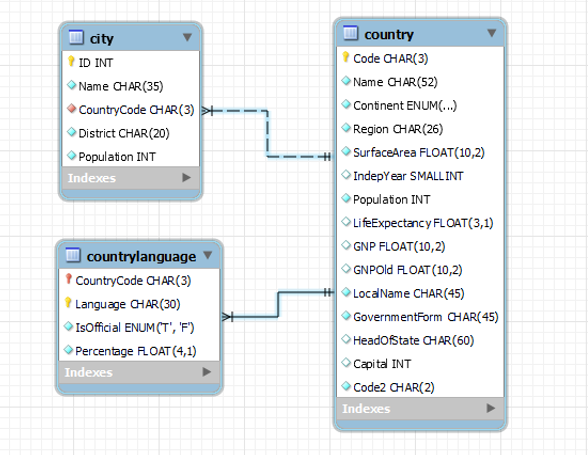

**IMPORTANTE:**

Por não ser uma solução escalável (apenas modelo), back e front estão no mesmo projeto a nível de organização, 
podendo portanto serem desacoplados, sem impacto no projeto.


# • Aplicação do lado do Servidor (Server Side):
-----------------------------------------------------------------------------------------------------------

### Construindo a primeira função teste do backend:
Para que o backend funcione é necessário um serviço de roteamento e que sobretudo seja capaz de simular o 
funcionamento de um servidor web. Sendo assim, devemos importar o respectivo pacote com essas propriedades.
A partir da nossa App Desktop, vamos subir um servidor Web e assim abrir um socket com uma porta
que recebe requisições:

        npm install express --save
-----------------------------------------------------------------------------------------------------------

Para importar pacotes usamos a palavra chave "require". Após instalar um pacote, a qualquer momento podemos carregá-lo.
A sequência é essa, instalar o pacote e carregá-lo em momento oportuno.
De forma mais elegante, podemos guardar a require em uma constante, ou seja guardar a referência para o pacote.

Vamos então criar o folder "src" e o file "index.js":

        const express = require('express');

        function main(){
            console.log("yullano90");
        }

        main
---------------------------------------------------------------------

### Definindo o protótipo da primeira rota no backend:
Em seguida, vamos chamar a função principal na variável "app", e esta passará a ter os recursos do express.
E dessa forma "app" passa a ser usado em "main". Sendo assim, passamos a criar uma action e por conseguinte,
devemos setar sua rota:

    const express = require('express');
    const app = express();

    function main() {
        app.get('/', function (req, res) {
            res.send("yullano90")
        }
        )
    }

    main

---------------------------------------------------------------------

### Definindo a porta de comunicação do serviço:
Sempre que um pacote de dados for enviado, "app" usa o protocolo HTTP, que por sua vez, roda em cima do TCP. Sendo assim, 
envia-se bytes pra uma determinada porta da aplicação de quem está escutando a request. Todo cliente que quer escutar uma 
conexão remota precisa de uma porta TCP, e o próprio protocolo TCP designa portas para alguns softwares (Ex: React, 3001).

Existe um método de "app" chamado "listen", e quando a resquest é feita é obrigatório passar a porta:

        const express = require('express');
        const app = express();
        const port = 3000;
        
        function main() {
            app.get('/', function (req, res) {
                let a = 3; 
                let b = 2;
                //console.log("Resultado: " + c) //Output API Console;
                res.send((a+b).toString()); //Output Console Client (Postman or Browser);
            })

            app.listen(port, () => {
                console.log(
                    `Olá @yullano90, sua App cliente está ouvindo na porta: ${port}`
                    ) //Output API Console;
            });
        }

        main();

-----------------------------------------------------------------------------------------------------------

### Subindo o Backend para primeiro teste: 
Abra o shell, execute o comando abaixo e verifique no console se a saída é a esperada:

        node index.js


-----------------------------------------------------------------------------------------------------------
### Criando um arquivo de configuração:

Avançando, vamos criar o nosso arquivo de configuração em texto, que simula um ambiente de execução.
Ou seja, as variáveis dele sobrescrevem as variáveis de produção. Então podemos usá-lo conforme ambiente
(produção, teste, etc). O pacote usado para gerenciar esse processo é o dotenv:

        npm install dotenv
        

Em todo arquivo que formos usá-lo, vamos chamá-lo no cabeçalho de index, vide abaixo a sintaxe ideal:

        require('dotenv').config({path: 'config.env'});


Em seguida, criamos o file "config.env" no folder "src":

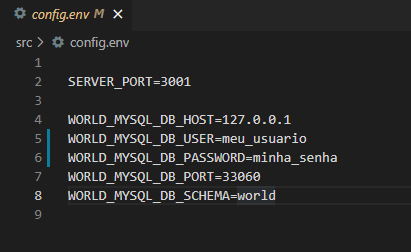
        
-----------------------------------------------------------------------------------------------------------
### Prototipando rotas e controllers (Topdown):

As rotas precisam ser registradas antes da aplicação ouvir. Logo, além de definí-las, é necessário exportá-las.
As actions efetivamente, são feitas por Controllers. Criamos então folder "controller" + file "countrycontroller.js".
Após, devemos importar a controller em routes, a essa altura o seu verbo HTTP também já precisa estar definido:

##### route:
        const countrycontroller = require('../controller/countrycontroller');

        module.exports = async function (app) {
            app.route('/country/getPopulationByCountry').post(countrycontroller.getPopulationByCountry);
        }

##### controller:

        async function getPopulationByCountry(req, res) {
            console.log(req.body);
            res.send('request sent successfully (Postman for example)');
        }

        exports.getPopulationByCountry = getPopulationByCountry;
        

O programador, ao documentar a reação da API durante requisições HTTP, usa o 'Index' pra "logar" o feedback no console da API e
a 'Controller' para "logar" no console do cliente.


### Definindo Models + Tratamento de Exceções Controller:

O tratamento de exceções consiste em cercar de todas as formas, possíveis erros durante as resquisições.
Quando passamos um parâmetro em uma request, certamente, estamos buscando recuperar dados para o cliente. 
Daí vem a  necessidade de criarmos a classe de "Models", que farão as devidas consultas SQL no banco de dados. A responsabilidade das Models, é trazer à tona os dados do negócio.

*Criamos o folder "repository", com o file "mySQLWorldDB.js", contendo as variáveis de ambiente do Node.js que 
permitam a conexão com o banco de dados.*
*Criamos então o folder "model" e o file "populationcountry".*

Abaixo temos um exemplo de Model e Controller, com as exceções de request devidamente tratadas e comentadas (Try Catch).*


*Model populationcity*

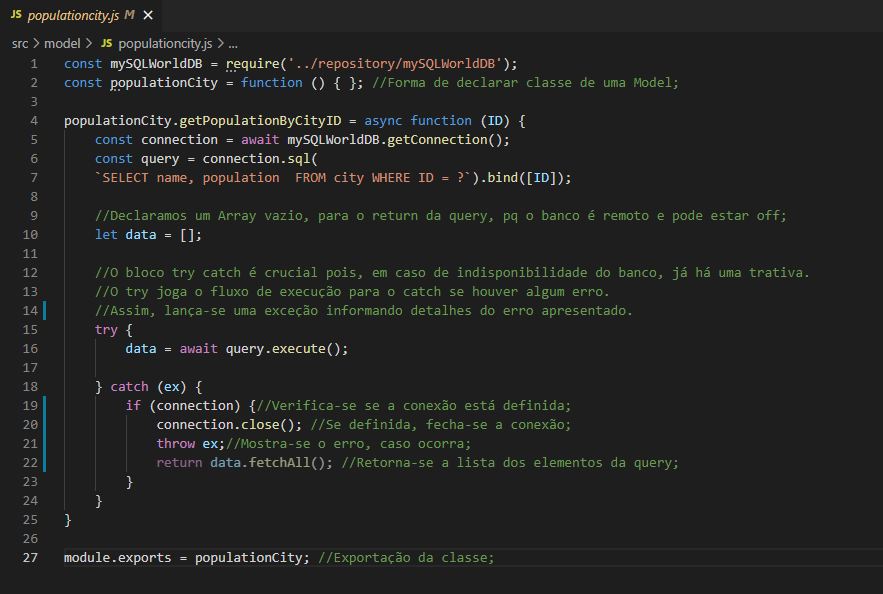

Nas configurações do Banco de Dados MySQL, usaremos então uma interface para um conector oficial do MySQL.
No caso, é o @mysql/xdevapi, vide abaixo comando de instalação:

        npm install @mysql/xdevapi --save --save-exact;
        
**Importante sempre dar o comando de install na root do projeto, para que ele possa achar o Package-json**

*Controller citycontroller:*

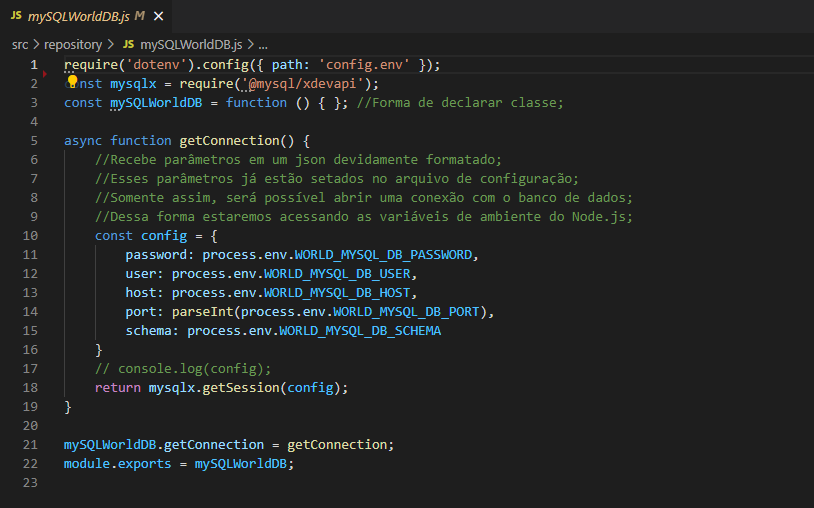


---